#027 Multi-class CNN's part 1_ Becoming one with the data

## Multi- class Image Classification

We 've just been through a bunch of the following steps with a
binary classification problem (pizza vs. steak), now we' re
going to step things up a notch with 10 classes of food
(multi—class classification) .


1. Become on with the data
2. Preprocess the data(get it ready for a model)
3. Create a model (Start with baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust diffent hyperparameters and improve the model(try to beat baseline/reduce overfittng)
7. Repeat until satisfied

##1. Import become one with the data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


--2024-03-08 10:28:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  87.0MB/s    in 7.3s    

2024-03-08 10:28:50 (68.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os

#wWalk thorogh 10 classes fo food image data

for dirpath,dirnames,filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directoris and {len(filenames)} images in {dirpath}.")

There are 2 directoris and 0 images in /content/10_food_classes_all_data.
There are 10 directoris and 0 images in /content/10_food_classes_all_data/train.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/ramen.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/chicken_wings.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/steak.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/hamburger.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/sushi.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/chicken_curry.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/pizza.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/fried_rice.
There are 0 directoris and 750 images in /content/10_food_classes_all_data/train/ice_cream.
There are 0 directoris a

In [5]:
# Setup the train and test directories


train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Let's get the class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
type(class_names)

numpy.ndarray

In [8]:
type(data_dir)

pathlib.PosixPath

In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


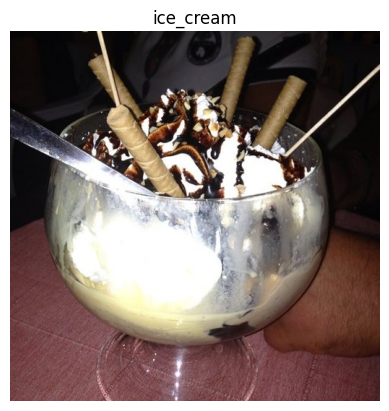

In [10]:
#Visualize the data

import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#2. Preprocess the data(prepare it for a model)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

# Load data in from directores and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical"
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##3. Create a model 

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

##Fit a model

In [13]:

# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
235/235 [==============================] - 36s 130ms/step - loss: 5.1292 - accuracy: 0.1152 - val_loss: 2.3014 - val_accuracy: 0.1144
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 2.1352 - accuracy: 0.2224 - val_loss: 2.3359 - val_accuracy: 0.1296
Epoch 3/5
235/235 [==============================] - 34s 143ms/step - loss: 1.6660 - accuracy: 0.4437 - val_loss: 2.6676 - val_accuracy: 0.1440
Epoch 4/5
235/235 [==============================] - 29s 123ms/step - loss: 1.0571 - accuracy: 0.6605 - val_loss: 3.2694 - val_accuracy: 0.1448
Epoch 5/5
235/235 [==============================] - 42s 177ms/step - loss: 0.6068 - accuracy: 0.8172 - val_loss: 4.1379 - val_accuracy: 0.1516


In [14]:
len(train_data)

235

##5. Evaluate the model

In [15]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 4.1379 - accuracy: 0.1516


[4.137944221496582, 0.15160000324249268]

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

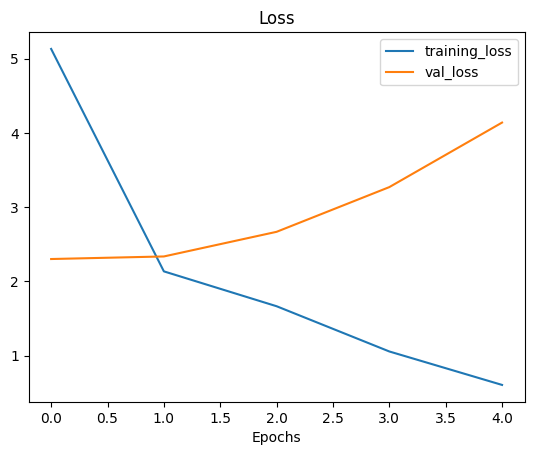

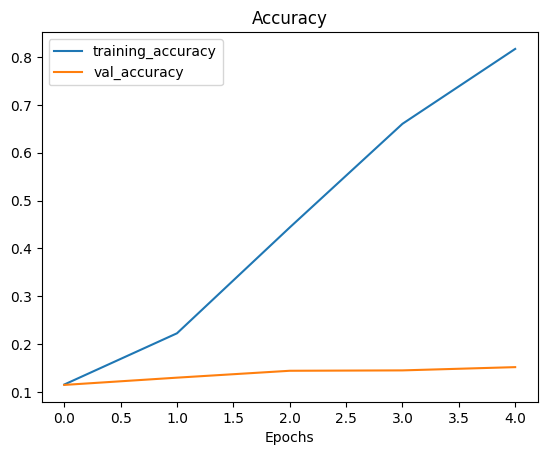

In [17]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_8)

In [19]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [20]:
# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),

  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),

  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [21]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [22]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 30s 121ms/step - loss: 54.9159 - accuracy: 0.1093 - val_loss: 2.3124 - val_accuracy: 0.0940
Epoch 2/5
235/235 [==============================] - 31s 133ms/step - loss: 2.1584 - accuracy: 0.2025 - val_loss: 2.4118 - val_accuracy: 0.1292
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.8364 - accuracy: 0.3516 - val_loss: 2.7016 - val_accuracy: 0.1232
Epoch 4/5
235/235 [==============================] - 34s 145ms/step - loss: 1.4698 - accuracy: 0.4955 - val_loss: 3.1209 - val_accuracy: 0.1268
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 1.1672 - accuracy: 0.6055 - val_loss: 3.9141 - val_accuracy: 0.1372


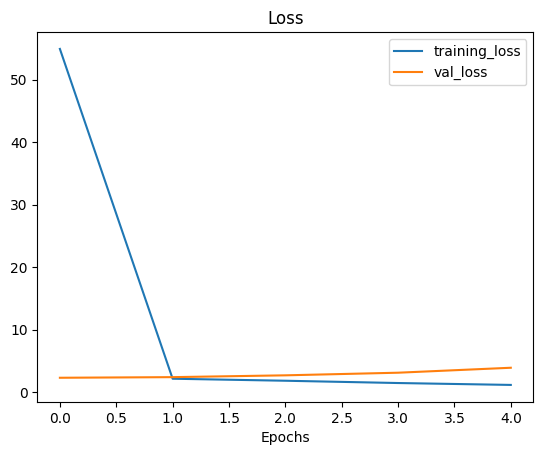

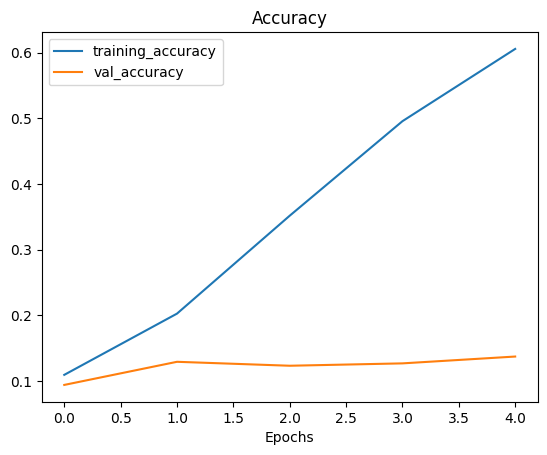

In [23]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

### data augmentation




In [24]:
# prompt: generate a code to do data augmentation

train_datagen_augmented = ImageDataGenerator(
                                              rescale=1/255.0,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,

                                          )


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical"
                                               )




Found 7500 images belonging to 10 classes.


In [26]:
## Let's create another model but this time we ' 11 fit it on the augmented training data of 10 classes

model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)

# Compile the model
model_10.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [27]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [29]:
# Fit the model
history_10 = model_9.fit(train_data_augmented, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 2.2390 - accuracy: 0.1723

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 104s 442ms/step - loss: 2.2390 - accuracy: 0.1723 - val_loss: 5.4435 - val_accuracy: 0.1380
Epoch 2/5
235/235 [==============================] - 103s 440ms/step - loss: 2.1816 - accuracy: 0.1989 - val_loss: 7.6878 - val_accuracy: 0.1540
Epoch 3/5
235/235 [==============================] - 107s 457ms/step - loss: 2.1648 - accuracy: 0.2075 - val_loss: 6.1542 - val_accuracy: 0.1580
Epoch 4/5
235/235 [==============================] - 104s 441ms/step - loss: 2.1432 - accuracy: 0.2244 - val_loss: 5.9319 - val_accuracy: 0.1620
Epoch 5/5
235/235 [==============================] - 120s 507ms/step - loss: 2.1231 - accuracy: 0.2359 - val_loss: 6.4604 - val_accuracy: 0.1624


In [30]:
model_8.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


79/79 [==============================] - 7s 83ms/step - loss: 4.1379 - accuracy: 0.1516


[4.137945175170898, 0.15160000324249268]

In [31]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 93.4454 - accuracy: 0.0908


[93.44540405273438, 0.09080000221729279]

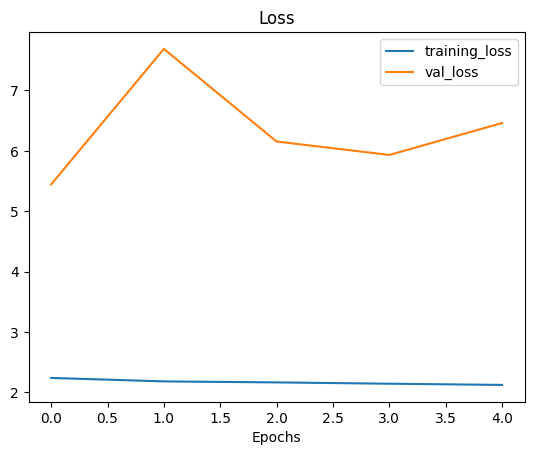

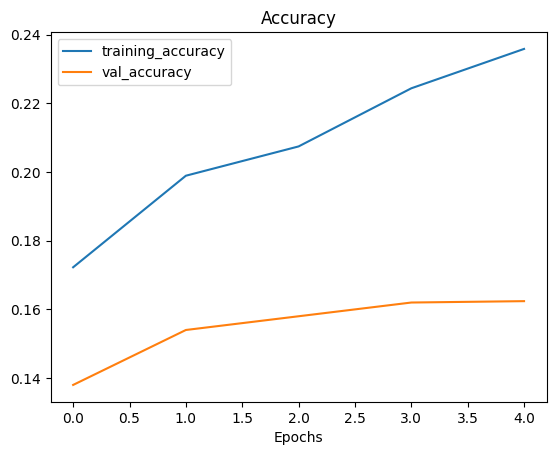

In [32]:
# Cehck our model trained on augmented data's loss curves
plot_loss_curves(history_10)